## SVM_SMO

An implementation of a support vector machine, trained using sequential minimal optimization.

This repository provides a "from scratch" implementation of a support vector machine. The weights are trained using sequential minimal optimization. A good overview of SVM optimization and the SMO algorithm can be found [here](http://cs229.stanford.edu/materials/smo.pdf). A detailed overview of the mathematics behind the SMO algorithm on which my implementation is based can be found [here](http://fourier.eng.hmc.edu/e176/lectures/ch9/node9.html).

This implementation of SVM currently supports two kernels - a linear kernel and radial basis function (RBF). For this demonstration, I will use SVMs to define decision boundaries between two classes of the Iris dataset.

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Reading data
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)][(np.where((iris["target"] == 1) | (iris["target"] == 2)))]
y = (iris["target"][(np.where((iris["target"] == 1) | (iris["target"] == 2)))] == 2).astype(np.float64)
y[y == 0] = -1

To get started, clone this repo and set it as your working directory. Then import the SVM class from SVM_SMO.py.

In [2]:
from SVM_SMO import SVM 

The model has several parameters, including a C parameter that determines how much to penalize observations that fall on the wrong side of the decision boundary. A large C will penalize misclassified instances more heavily, resulting in a decision boundary that correctly classifies more of the training examples at the risk of overfitting the data. The model also has a gamma parameter for the free parameter of the RBF kernel.

Let's train an SVM that uses a linear decision boundary. This is the default kernel.

In [3]:
svm_mod = SVM(epsilon = .0001)

The default C parameter is 1.

In [4]:
svm_mod.C

1.0

Use the fit method to train the model.

In [5]:
svm_mod.fit(X, y)

Use the predict method to get predictions from new data. Using a mesh grid, I make several predictions to visualize the decision boundary of my model.

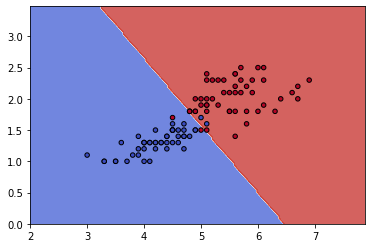

In [6]:
# Creating mesh grid for visualization
h = .03
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
input_df = np.c_[xx.ravel(), yy.ravel()]

# Getting model predictions and visualizing decision boundary
predictions = svm_mod.predict(input_df)
Z = predictions.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.show()

This model also supports RBF kernels. Here, I estimate several SVM's using different combinations of C and gammma parameters. 

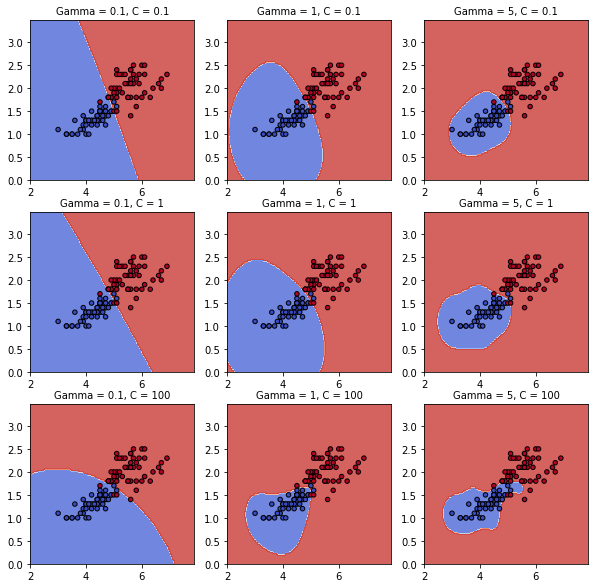

In [7]:
plt.rcParams['figure.figsize'] = [10, 10]

# Fitting SVM's and getting predictions for different hyperparameter values 
fig, ax_list = plt.subplots(3, 3)
np.random.seed(123)
for C_i, gamma_i, ax in zip([.1, .1, .1, 1, 1, 1, 100, 100, 100], [.1, 1, 5, .1, 1, 5, .1, 1, 5], ax_list.flatten()):
    
    # Storing SVM object
    svm_mod = SVM(C = C_i, gamma = gamma_i, max_iter = 100, kernel = "rbf")

    # Fitting SVM model
    svm_mod.fit(X, y)
    
    # Getting model predictions and visualizing decision boundary
    predictions = svm_mod.predict(input_df)
    Z = predictions.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_title("Gamma = " + str(gamma_i) + ", C = " + str(C_i), fontsize=10)
  